In [9]:
import sys
import os

pwd = os.getcwd()
python_path = pwd[: pwd.rfind("/")]
sys.path.append(python_path)

In [34]:
import torch
import numpy as np
import cv2 as cv
from utils import show_images, read_images
from constants import ORIGINAL_IMAGES_PATH, SEGMENTATION_CLASS_PATH, TEST_FAKE_BACTERIAS_PATH, TEST_FAKE_MASKS_PATH
from torchmetrics.classification import MultilabelJaccardIndex
import segmentation_models_pytorch as smp

In [11]:
def get_by_indexes(array: list, indexes: list[int]):
    return [array[index] for _, index in enumerate(indexes)]


def show_orig_and_mask(orig_path: str, mask_path: str, indexes: list[int]):
    add_title = lambda images: [(image, '') for image in images]
    orig = get_by_indexes(add_title(read_images(orig_path)), indexes)
    mask = get_by_indexes(add_title(read_images(mask_path)), indexes)
    show_images([
        *orig, 
        *mask
    ], grid=(2, len(indexes) * 2))
    

INDEXES = [1, 4, 5]

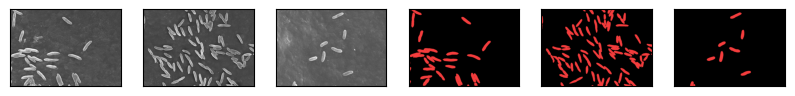

In [12]:
show_orig_and_mask(
    orig_path=ORIGINAL_IMAGES_PATH,
    mask_path=SEGMENTATION_CLASS_PATH,
    indexes=INDEXES
)

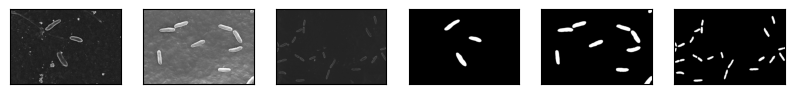

In [13]:
show_orig_and_mask(
    orig_path=TEST_FAKE_BACTERIAS_PATH,
    mask_path=TEST_FAKE_MASKS_PATH,
    indexes=INDEXES
)

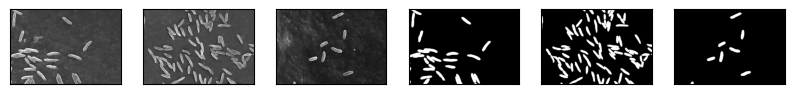

In [14]:
origs = read_images(ORIGINAL_IMAGES_PATH)
masks = read_images(SEGMENTATION_CLASS_PATH)

assert(len(origs) == len(masks))

origs_new = []
masks_new = []

NEW_MASKS_PATH = '../../data/fake/test_new/masks'
NEW_ORIGS_PATH = '../../data/fake/test_new/bacterias'

for i in range(len(origs)):
    orig_new = cv.cvtColor(origs[i], cv.COLOR_BGR2GRAY)[:864, :1280]
    mask_new = cv.cvtColor(masks[i], cv.COLOR_BGR2GRAY)[:864, :1280]
    mask_new[mask_new > 0] = 255 # type: ignore

    origs_new.append(orig_new)
    masks_new.append(mask_new)
    
    # cv.imwrite(f'{NEW_ORIGS_PATH}/orig_{i}.png', orig_new)
    # cv.imwrite(f'{NEW_MASKS_PATH}/mask_{i}.png', mask_new)
    
origs_new = [(item, '') for item in get_by_indexes(origs_new, INDEXES)]
masks_new = [(item, '') for item in get_by_indexes(masks_new, INDEXES)]

show_images(
    [
        *origs_new,
        *masks_new
    ], grid=(2, len(origs_new) *2)
)

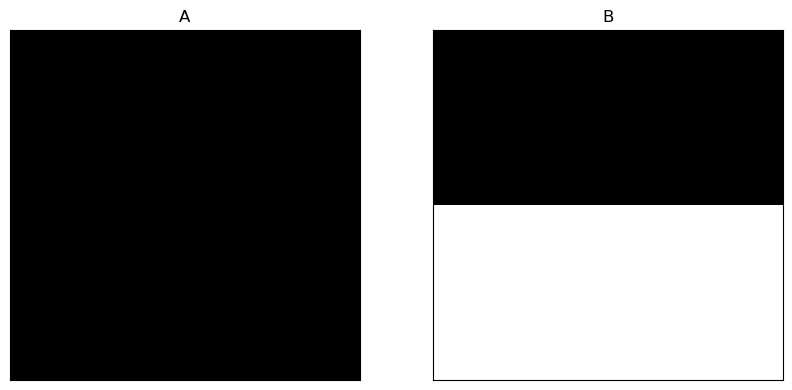

In [38]:
A = np.array([
    [0, 0],
    [0, 0]
])

B = np.array([
    [0, 0],
    [1, 1]
])

show_images([
    (A, 'A'),
    (B, 'B')
])

In [45]:
A = torch.tensor(A).int()
B = torch.tensor(B).int()

# loss_fn = smp.losses.JaccardLoss(smp.losses.BINARY_MODE, from_logits=True, log_loss=True)
# loss_fn(A, B)

/tmp/ipykernel_59469/2648292397.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  A = torch.tensor(A).int()
/tmp/ipykernel_59469/2648292397.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  B = torch.tensor(B).int()


In [46]:
metric = MultilabelJaccardIndex(num_labels=2)
metric(A, B)

tensor(0.)